# Code to make Figure 10
- Decadal map composites over southern Ross Sea for near surface wind
- Notebook by Alice DuVivier (NCAR)
- February 2023

In [1]:
import pandas as pd
from minisom import MiniSom, asymptotic_decay
import xarray as xr
import cftime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as cls
from itertools import product
import cartopy
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
from datetime import timedelta
from itertools import product
import dask
import cmocean
import geopandas as gpd

## Set some details for region

In [2]:
# set the location of the already extracted training data
sector_short = 'Ross'
path_in = '/glade/p/cgd/ppc/duvivier/cesm2_antarctic_polynya/SOM_analysis/analysis/'+sector_short+'_analysis_v4/'
path_out = path_in+'figures_outline/'
# set shape files info
fname= '/glade/p/cgd/ppc/duvivier/cesm2_antarctic_polynya/SOM_analysis/analysis/Ross_analysis_v4/USNIC_ANTARC_shelf_2022/USNIC_ANTARC_shelf_2022.shp' 

In [3]:
# set path to the pulled data
# Note data is for larger area than only training points
# this data has been processed all the same 'time' coordinates as training data
data_path_in = '/glade/p/cgd/ppc/duvivier/cesm2_antarctic_polynya/SOM_analysis/DATA/data_for_composites/'


### Load in wind data

In [4]:
# variable
var_composite_in = 'U10'

# file name for training variable only here 
fin_composite = 'antarctic_data_for_som_composites_'+var_composite_in

# load data
ds_wind = xr.open_mfdataset(data_path_in+fin_composite+'.nc')
#ds_wind = xr.open_mfdataset(data_path_in+fin_composite+'_allSH.nc')

print('loaded '+var_composite_in)

loaded U10


### Load in wind vector data

In [5]:
# variable
var_composite_in = 'U'

# file name for training variable only here 
fin_composite = 'antarctic_data_for_som_composites_'+var_composite_in

# load data
ds_U = xr.open_mfdataset(data_path_in+fin_composite+'.nc')

print('loaded '+var_composite_in)


loaded U


In [6]:
# variable
var_composite_in = 'V'

# file name for training variable only here 
fin_composite = 'antarctic_data_for_som_composites_'+var_composite_in

# load data
ds_V = xr.open_mfdataset(data_path_in+fin_composite+'.nc')

print('loaded '+var_composite_in)


loaded V


### Load in ice data

In [7]:
# variable
var_composite_in = 'aice_d'

# file name for training variable only here 
fin_composite = 'antarctic_data_for_som_composites_'+var_composite_in

# load data
ds_ice = xr.open_mfdataset(data_path_in+fin_composite+'.nc')

print('loaded '+var_composite_in)


loaded aice_d


## Calculate the mean for all winter by decade

In [8]:
# calculate winter mean against which to do anomalies
mean_all_wind = ds_wind.data.mean(dim='training_times')
mean_all_U = ds_U.data.mean(dim='training_times')
mean_all_V = ds_V.data.mean(dim='training_times')
mean_all_ice = ds_ice.data.mean(dim='training_times')

In [9]:
decade_names = ['1980','1990', '2000', '2010', '2020', '2030', '2040', '2050', '2060', '2070']

In [10]:
# make numpy array to fill and specify dimensions we want
decade_array_wind = np.zeros([len(decade_names),len(mean_all_wind.lat),len(mean_all_wind.lon)])
decade_array_U = np.zeros([len(decade_names),len(mean_all_U.lat),len(mean_all_U.lon)])
decade_array_V = np.zeros([len(decade_names),len(mean_all_V.lat),len(mean_all_V.lon)])

for dd in decade_names:
    print('decade: '+dd+'s')
    if dd == '1980':
        d_count = 0
        yy_st = 1980
    else: 
        d_count = d_count+1
        yy_st = yy_st + 10
    # get years for this decade
    yy_ed = yy_st + 10
    yy_all = list(range(yy_st,yy_ed,1))
    # get mean for this decade
    decade_array_wind[d_count,:,:] = ds_wind.data.isel(training_times=ds_wind.time.dt.year.isin([yy_all])).mean(dim='training_times')
    decade_array_U[d_count,:,:] = ds_U.data.isel(training_times=ds_U.time.dt.year.isin([yy_all])).mean(dim='training_times')
    decade_array_V[d_count,:,:] = ds_V.data.isel(training_times=ds_V.time.dt.year.isin([yy_all])).mean(dim='training_times')    


decade: 1980s


/glade/work/duvivier/miniconda3/envs/geo_env/lib/python3.11/site-packages/xarray/core/indexing.py:1379: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]
/glade/work/duvivier/miniconda3/envs/geo_env/lib/python3.11/site-packages/xarray/core/indexing.py:1379: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  r

decade: 1990s


/glade/work/duvivier/miniconda3/envs/geo_env/lib/python3.11/site-packages/xarray/core/indexing.py:1379: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]
/glade/work/duvivier/miniconda3/envs/geo_env/lib/python3.11/site-packages/xarray/core/indexing.py:1379: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  r

decade: 2000s


/glade/work/duvivier/miniconda3/envs/geo_env/lib/python3.11/site-packages/xarray/core/indexing.py:1379: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]
/glade/work/duvivier/miniconda3/envs/geo_env/lib/python3.11/site-packages/xarray/core/indexing.py:1379: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  r

decade: 2010s


/glade/work/duvivier/miniconda3/envs/geo_env/lib/python3.11/site-packages/xarray/core/indexing.py:1379: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]
/glade/work/duvivier/miniconda3/envs/geo_env/lib/python3.11/site-packages/xarray/core/indexing.py:1379: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  r

decade: 2020s


/glade/work/duvivier/miniconda3/envs/geo_env/lib/python3.11/site-packages/xarray/core/indexing.py:1379: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]
/glade/work/duvivier/miniconda3/envs/geo_env/lib/python3.11/site-packages/xarray/core/indexing.py:1379: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  r

decade: 2030s


/glade/work/duvivier/miniconda3/envs/geo_env/lib/python3.11/site-packages/xarray/core/indexing.py:1379: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]
/glade/work/duvivier/miniconda3/envs/geo_env/lib/python3.11/site-packages/xarray/core/indexing.py:1379: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  r

decade: 2040s


/glade/work/duvivier/miniconda3/envs/geo_env/lib/python3.11/site-packages/xarray/core/indexing.py:1379: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]
/glade/work/duvivier/miniconda3/envs/geo_env/lib/python3.11/site-packages/xarray/core/indexing.py:1379: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  r

decade: 2050s


/glade/work/duvivier/miniconda3/envs/geo_env/lib/python3.11/site-packages/xarray/core/indexing.py:1379: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]
/glade/work/duvivier/miniconda3/envs/geo_env/lib/python3.11/site-packages/xarray/core/indexing.py:1379: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  r

decade: 2060s


/glade/work/duvivier/miniconda3/envs/geo_env/lib/python3.11/site-packages/xarray/core/indexing.py:1379: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]
/glade/work/duvivier/miniconda3/envs/geo_env/lib/python3.11/site-packages/xarray/core/indexing.py:1379: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  r

decade: 2070s


/glade/work/duvivier/miniconda3/envs/geo_env/lib/python3.11/site-packages/xarray/core/indexing.py:1379: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]
/glade/work/duvivier/miniconda3/envs/geo_env/lib/python3.11/site-packages/xarray/core/indexing.py:1379: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  r

In [11]:
# make numpy array to fill and specify dimensions we want
decade_array_ice = np.zeros([len(decade_names),len(mean_all_ice.nj),len(mean_all_ice.ni)])

for dd in decade_names:
    print('decade: '+dd+'s')
    if dd == '1980':
        d_count = 0
        yy_st = 1980
    else: 
        d_count = d_count+1
        yy_st = yy_st + 10
    # get years for this decade
    yy_ed = yy_st + 10
    yy_all = list(range(yy_st,yy_ed,1))
    # get mean for this decade
    decade_array_ice[d_count,:,:] = ds_ice.data.isel(training_times=ds_ice.time.dt.year.isin([yy_all])).mean(dim='training_times')


decade: 1980s


/glade/work/duvivier/miniconda3/envs/geo_env/lib/python3.11/site-packages/xarray/core/indexing.py:1379: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]


decade: 1990s


/glade/work/duvivier/miniconda3/envs/geo_env/lib/python3.11/site-packages/xarray/core/indexing.py:1379: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]


decade: 2000s


/glade/work/duvivier/miniconda3/envs/geo_env/lib/python3.11/site-packages/xarray/core/indexing.py:1379: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]


decade: 2010s


/glade/work/duvivier/miniconda3/envs/geo_env/lib/python3.11/site-packages/xarray/core/indexing.py:1379: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]


decade: 2020s


/glade/work/duvivier/miniconda3/envs/geo_env/lib/python3.11/site-packages/xarray/core/indexing.py:1379: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]


decade: 2030s


/glade/work/duvivier/miniconda3/envs/geo_env/lib/python3.11/site-packages/xarray/core/indexing.py:1379: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]


decade: 2040s


/glade/work/duvivier/miniconda3/envs/geo_env/lib/python3.11/site-packages/xarray/core/indexing.py:1379: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]


decade: 2050s


/glade/work/duvivier/miniconda3/envs/geo_env/lib/python3.11/site-packages/xarray/core/indexing.py:1379: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]


decade: 2060s


/glade/work/duvivier/miniconda3/envs/geo_env/lib/python3.11/site-packages/xarray/core/indexing.py:1379: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]


decade: 2070s


/glade/work/duvivier/miniconda3/envs/geo_env/lib/python3.11/site-packages/xarray/core/indexing.py:1379: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]


In [12]:
print(decade_array_wind.shape)
print(decade_array_U.shape)
print(decade_array_V.shape)
print(decade_array_ice.shape)

(10, 31, 288)
(10, 31, 288)
(10, 31, 288)
(10, 36, 320)


In [13]:
# convert the numpy array to a xarray for easier plotting
decade_means_wind = xr.DataArray(decade_array_wind,dims=('decade','lat','lon'))
decade_means_U = xr.DataArray(decade_array_U,dims=('decade','lat','lon'))
decade_means_V = xr.DataArray(decade_array_V,dims=('decade','lat','lon'))
decade_means_ice = xr.DataArray(decade_array_ice,dims=('decade','nj','ni'))

In [14]:
mean_all_ice

<xarray.DataArray 'data' (nj: 36, ni: 320)>
dask.array<mean_agg-aggregate, shape=(36, 320), dtype=float32, chunksize=(36, 320), chunktype=numpy.ndarray>
Coordinates:
    TLON     (nj, ni) float32 dask.array<chunksize=(36, 320), meta=np.ndarray>
    TLAT     (nj, ni) float32 dask.array<chunksize=(36, 320), meta=np.ndarray>
  * nj       (nj) int64 0 1 2 3 4 5 6 7 8 9 10 ... 26 27 28 29 30 31 32 33 34 35
  * ni       (ni) int64 0 1 2 3 4 5 6 7 8 ... 312 313 314 315 316 317 318 319

In [15]:
# set coordinate arrays
decade_means_wind['decade'] = decade_names
decade_means_wind['lat'] = mean_all_wind['lat'].values
decade_means_wind['lon'] = mean_all_wind['lon'].values

decade_means_U['decade'] = decade_names
decade_means_U['lat'] = mean_all_U['lat'].values
decade_means_U['lon'] = mean_all_U['lon'].values

decade_means_V['decade'] = decade_names
decade_means_V['lat'] = mean_all_V['lat'].values
decade_means_V['lon'] = mean_all_V['lon'].values

decade_means_ice['decade'] = decade_names
decade_means_ice['nj'] = mean_all_ice['nj'].values
decade_means_ice['ni'] = mean_all_ice['ni'].values

## Make plots

In [16]:
# Set plotting limits
lat_max = -72
lat_min = -80
lon_max = 200
lon_min = 160
lon_avg = 190

In [17]:
#set shape files info
shdf = gpd.read_file(fname)
# This line is important. Here we convert the projection from the shapefile one to the cartopy one 
shdf = shdf.to_crs(ccrs.SouthPolarStereo())

# Shapefile projection conversion
shdf = gpd.read_file(fname)
shdf = shdf.to_crs(ccrs.SouthPolarStereo(central_longitude=lon_avg))


In [18]:
# wind details
title_in = '10m wind speed'
units = 'm/s'
levels_in = np.arange(0,13,1)  
ticks_in = [0,2,4,6,8,10,12]
cmap_in = cmocean.cm.tempo    

levels_diff = np.arange(-1.5,1.75,0.25) 
ticks_diff = [-1,-0.5,0,0.5,1]
levels_pct_diff = np.arange(-20,25,5) 
ticks_pct_diff = [-20,-10,0,10,20]
cmap_diff = cmocean.cm.diff

# vector interval
intv = 5

# ice details
levels_ice_in = np.arange(70,102.5,2.5)
ticks_ice_in = [70,80,90,100]

levels_ice_diff = np.arange(-25,30,5)
ticks_ice_diff = [-20,-15,-10,-5,0,5,10,15,20]

ice_color = 'darkgrey'

In [20]:
# bootstrap significance calculation 
# (only should be done for the far right panel; the diffs)

num_iterations = 10000  # this number should be somewhere between 1,000 to 10,000

# create empty array to use for percentile calculation
boot_diff_array = np.zeros((num_iterations, 
                      decade_means_wind.isel(decade=0).shape[0],
                      decade_means_wind.isel(decade=0).shape[1]))

# loop to bootstrap sample array of decades
for i in range(num_iterations):

    ar1 = np.random.choice(np.arange(0,10,1)) # pick random int
    ar2 = np.random.choice(np.arange(0,10,1)) # pick random int
    
    arr1 = 100 * decade_means_wind.isel(decade=ar1) # pick random decade
    arr2 = 100 * decade_means_wind.isel(decade=ar2) # pick random decade
    
    boot_diff_array[i,:,:] = arr1.values - arr2.values  # take diff of random decades

In [24]:
# convert the numpy array to a xarray for calculating
boot_diff = xr.DataArray(boot_diff_array,dims=('nboot','lat','lon'))

# set coordinate arrays
boot_diff['lat'] = mean_all_wind['lat'].values
boot_diff['lon'] = mean_all_wind['lon'].values

In [25]:
# using thresholds, we ask: "did this difference (2070-1980) occur by chance? or is it significant?"
# if it exceeds upper and lower bounds, it is likely that this did not occur by chance

# calculate unique value at all points over all bootstraps
max_thresh_all = boot_diff.quantile(0.975,dim='nboot')
min_thresh_all = boot_diff.quantile(0.025,dim='nboot')


/glade/work/duvivier/miniconda3/envs/geo_env/lib/python3.11/site-packages/cartopy/mpl/geoaxes.py:1614: UserWarning: The following kwargs were not used by contour: 'linewidth'
  result = super().contour(*args, **kwargs)


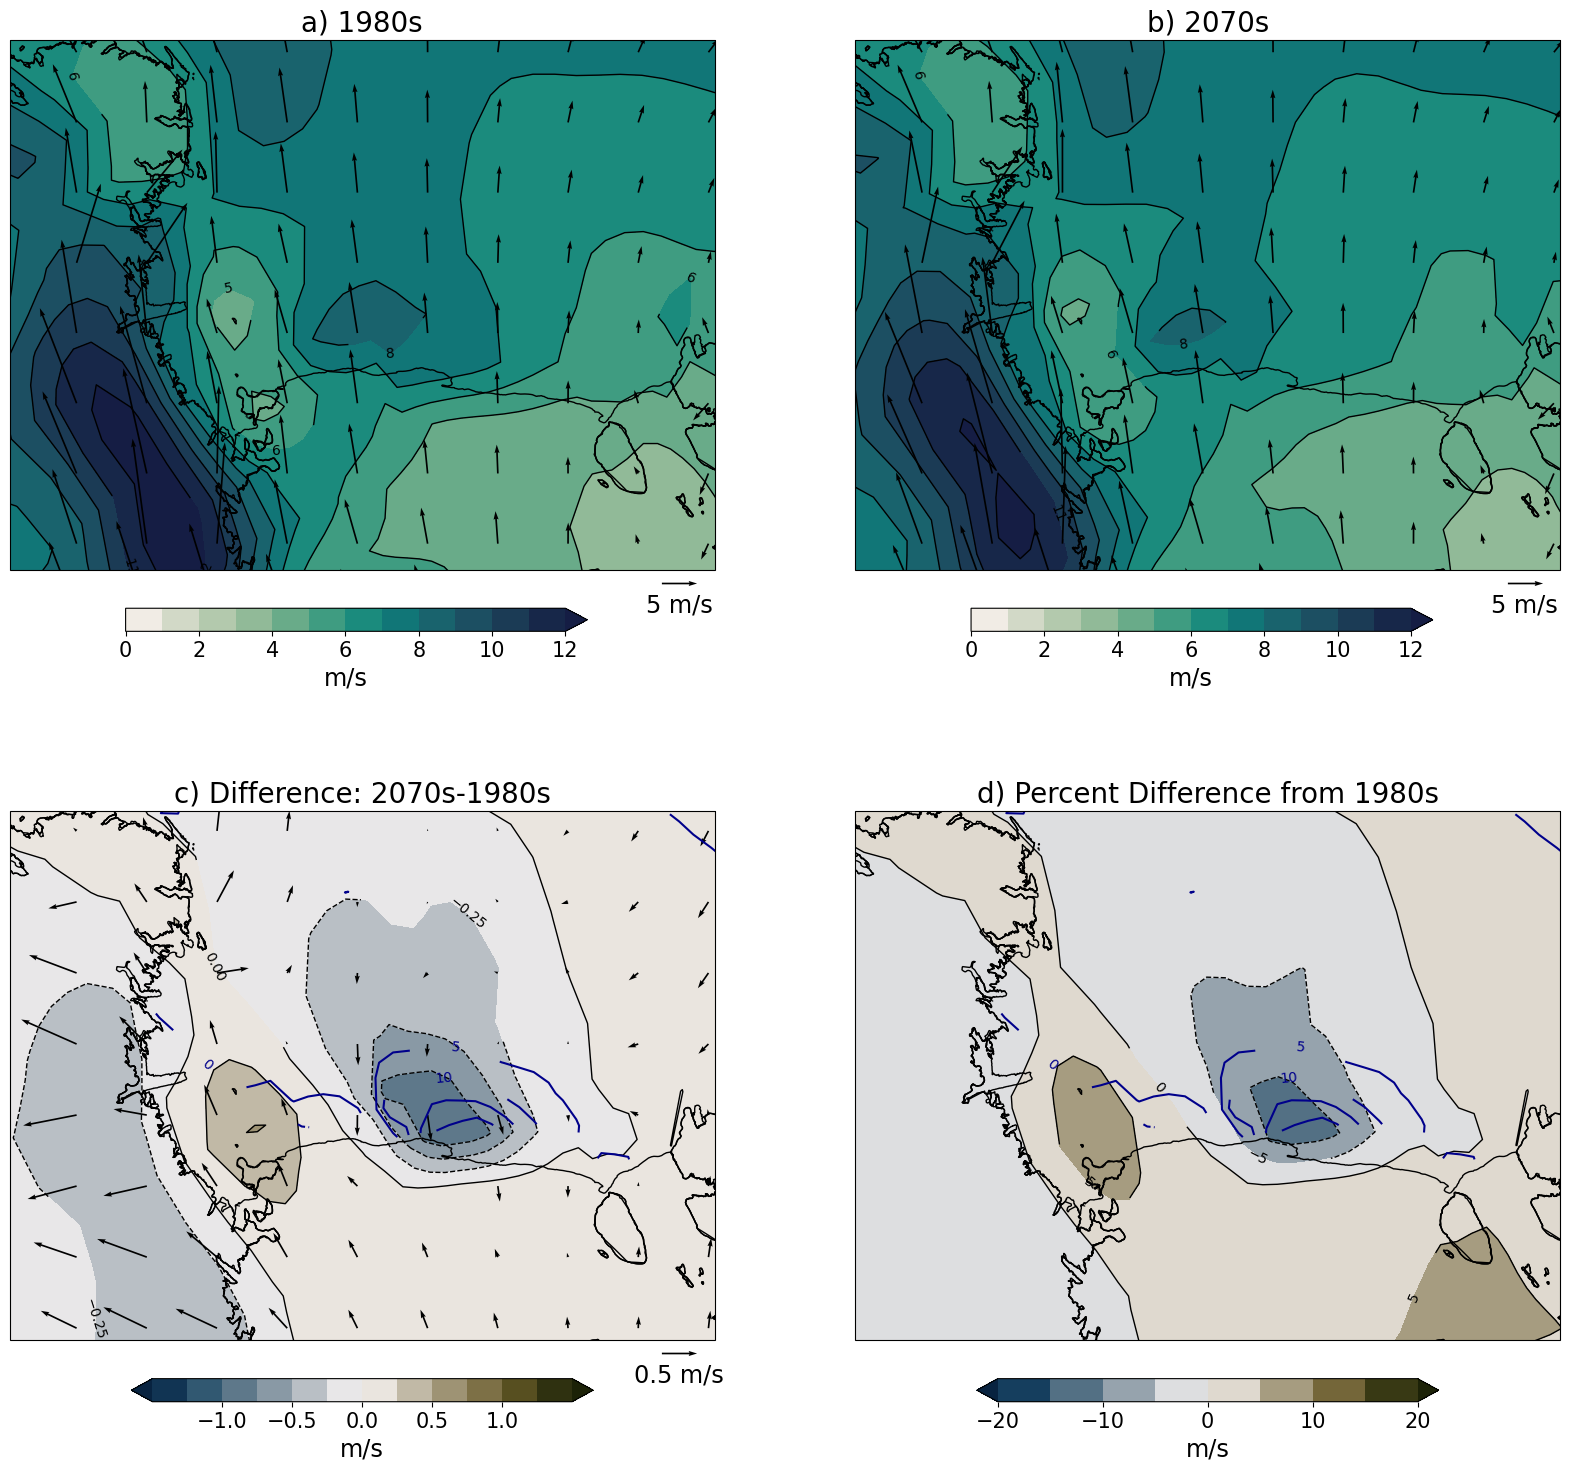

In [29]:
## 2060's difference figure
tag = '2070'

# select wind data
data_ctrl = decade_means_wind.sel(decade='1980')
data_in = decade_means_wind.sel(decade=tag)
data_diff = data_in - data_ctrl
data_pct_diff = 100*((data_in - data_ctrl)/data_ctrl)

# keep only data that is significantly different
sig = data_diff.where((data_diff >= max_thresh_all)|(data_diff <= min_thresh_all))
# keep only data that is NOT significancly different because we want to stipple NOT significant points
sig2 = data_diff.where((data_diff <= max_thresh_all)&(data_diff >= min_thresh_all))

# select U data
data_u_ctrl = decade_means_U.sel(decade='1980')
data_u_in = decade_means_U.sel(decade=tag)
data_u_diff = data_u_in - data_u_ctrl

# select V data
data_v_ctrl = decade_means_V.sel(decade='1980')
data_v_in = decade_means_V.sel(decade=tag)
data_v_diff = data_v_in - data_v_ctrl

# select ice data
data_ice_ctrl = 100*decade_means_ice.sel(decade='1980')
data_ice_in = 100*decade_means_ice.sel(decade=tag)
data_ice_diff = data_ice_in - data_ice_ctrl

# get lats/lons for plotting
lons = ds_wind.lon
lats = ds_wind.lat
lons_vect = ds_U.lon
lats_vect = ds_U.lat
lons_ice = ds_ice.TLON
lats_ice = ds_ice.TLAT

# create figure
fig = plt.figure(figsize=(20,20))
fout = path_out+'fig10'
title = 'Winter (JAS) mean '+title_in+' and differences ('+tag+'s-1980s) in '+sector_short+' Sea'

# plot the subplots - note it's nrow x ncol x index (starting upper left)
### mean over 1980s
ax = fig.add_subplot(2,2,1, projection = ccrs.SouthPolarStereo(central_longitude=lon_avg) )
this = ax.contourf(lons,lats,
                   data_ctrl,
                   transform=ccrs.PlateCarree(),
                   cmap = cmap_in,
                   levels=levels_in, extend='max')
cbar = plt.colorbar(this,orientation='horizontal',ticks=ticks_in,label=units,fraction=0.03,pad=0.05)
cbar.ax.tick_params(labelsize=15)
cbar.set_label(units, fontsize='xx-large')
# overlay contours
this2 = ax.contour(lons,lats,
                   data_ctrl,
                   transform=ccrs.PlateCarree(),
                   colors = 'black', levels = levels_in,linewidths=1)
plt.clabel(this2,colors = 'black', inline=1,fontsize=10,levels=levels_in)
# add vectors
Q = ax.quiver(lons_vect.values,lats_vect.values,
              data_u_ctrl.values, data_v_ctrl.values,
              regrid_shape=50, scale = 100,
              transform=ccrs.PlateCarree())
qk = ax.quiverkey(Q,0.95,-0.025,5,r'5 '+units,labelpos='S', coordinates='axes',color='black',zorder=2,fontproperties={'size':'xx-large'})
# set final plot details
ax.set_extent([lon_min,lon_max,lat_min,lat_max])
ax.add_feature(cartopy.feature.LAND, zorder=10, edgecolor='k', facecolor='none')
# Plotting shapefile
ax.add_geometries(shdf.geometry , ccrs.SouthPolarStereo(central_longitude=lon_avg), facecolor='none', edgecolor='black',linewidth=1, zorder=10)
plt.title('a) 1980s',fontsize=20)

### mean future
ax = fig.add_subplot(2,2,2, projection = ccrs.SouthPolarStereo(central_longitude=lon_avg) )
this = ax.contourf(lons,lats,
                   data_in,
                   transform=ccrs.PlateCarree(),
                   cmap = cmap_in,
                   levels=levels_in, extend='max')
cbar = plt.colorbar(this,orientation='horizontal',ticks=ticks_in,label=units,fraction=0.03,pad=0.05)
cbar.ax.tick_params(labelsize=15)
cbar.set_label(units, fontsize='xx-large')
# overlay contours
this2 = ax.contour(lons,lats,
                   data_in,
                   transform=ccrs.PlateCarree(),
                   colors = 'black', levels = levels_in,linewidths=1)
plt.clabel(this2,colors = 'black', inline=1,fontsize=10,levels=levels_in)
# add vectors
Q = ax.quiver(lons_vect.values,lats_vect.values,
              data_u_in.values, data_v_in.values,
              regrid_shape=50, scale = 100,
              transform=ccrs.PlateCarree())
qk = ax.quiverkey(Q,0.95,-0.025,5,r'5 '+units,labelpos='S', coordinates='axes',color='black',zorder=2,fontproperties={'size':'xx-large'})
# set final plot details
ax.set_extent([lon_min,lon_max,lat_min,lat_max])
ax.add_feature(cartopy.feature.LAND, zorder=10, edgecolor='k', facecolor='none')
# Plotting shapefile
ax.add_geometries(shdf.geometry , ccrs.SouthPolarStereo(central_longitude=lon_avg), facecolor='none', edgecolor='black',linewidth=1, zorder=10)
plt.title('b) '+tag+'s',fontsize=20)

### diff
ax = fig.add_subplot(2,2,3, projection = ccrs.SouthPolarStereo(central_longitude=lon_avg) )
this = ax.contourf(lons,lats,
                     data_diff,
                     transform=ccrs.PlateCarree(),
                     cmap = cmap_diff,
                     levels=levels_diff, extend='both')
cbar = plt.colorbar(this,orientation='horizontal',ticks=ticks_diff,label=units,fraction=0.03,pad=0.05)
cbar.ax.tick_params(labelsize=15)
cbar.set_label(units, fontsize='xx-large')
# overlay contours
this2 = ax.contour(lons,lats,
                   data_diff,
                   transform=ccrs.PlateCarree(),
                   colors = 'black', levels = levels_diff,linewidths=1)
plt.clabel(this2,colors = 'black', inline=1,fontsize=10,levels=levels_diff)
# add significance overtop - stippling where it is NOT significant
#this3 = ax.pcolor(lons,lats,
#                  sig2,
#                  transform=ccrs.PlateCarree(),
#                  hatch='.',
#                  alpha= 0)
# add ice difference contours overtop
this4 = ax.contour(lons_ice,lats_ice,
                   data_ice_diff,
                   transform=ccrs.PlateCarree(),
                   colors = 'darkblue',
                   levels=levels_ice_diff,extend='both',linewidth=0.05)
plt.clabel(this4,colors='darkblue',inline=1,fontsize=10,levels=ticks_ice_diff)
# add vectors
Q = ax.quiver(lons_vect.values,lats_vect.values,
              data_u_diff.values, data_v_diff.values,
              regrid_shape=50, scale = 10,
              transform=ccrs.PlateCarree())
qk = ax.quiverkey(Q,0.95,-0.025,0.5,r'0.5 '+units,labelpos='S', coordinates='axes',color='black',zorder=100,fontproperties={'size':'xx-large'})
# set final plot details
ax.set_extent([lon_min,lon_max,lat_min,lat_max])
ax.add_feature(cartopy.feature.LAND, zorder=10, edgecolor='k', facecolor='none')
# Plotting shapefile
ax.add_geometries(shdf.geometry , ccrs.SouthPolarStereo(central_longitude=lon_avg), facecolor='none', edgecolor='black',linewidth=1, zorder=10)
plt.title('c) Difference: '+tag+'s-1980s',fontsize=20)

### percent diff
ax = fig.add_subplot(2,2,4, projection = ccrs.SouthPolarStereo(central_longitude=lon_avg) )
this = ax.contourf(lons,lats,
                     data_pct_diff,
                     transform=ccrs.PlateCarree(),
                     cmap = cmap_diff,
                     levels=levels_pct_diff, extend='both')
cbar = plt.colorbar(this,orientation='horizontal',ticks=ticks_pct_diff,label='%',fraction=0.03,pad=0.05)
cbar.ax.tick_params(labelsize=15)
cbar.set_label(units, fontsize='xx-large')
# overlay contours
this2 = ax.contour(lons,lats,
                   data_pct_diff,
                   transform=ccrs.PlateCarree(),
                   colors = 'black', levels = levels_pct_diff,linewidths=1)
plt.clabel(this2,colors = 'black', inline=1,fontsize=10,levels=levels_pct_diff)
# add ice difference contours overtop
this3 = ax.contour(lons_ice,lats_ice,
                   data_ice_diff,
                   transform=ccrs.PlateCarree(),
                   colors = 'darkblue',
                   levels=levels_ice_diff,extend='both',linewidth=0.05)
plt.clabel(this3,colors='darkblue',inline=1,fontsize=10,levels=ticks_ice_diff)
# set final plot details
ax.set_extent([lon_min,lon_max,lat_min,lat_max])
ax.add_feature(cartopy.feature.LAND, zorder=10, edgecolor='k', facecolor='none')
# Plotting shapefile
ax.add_geometries(shdf.geometry , ccrs.SouthPolarStereo(central_longitude=lon_avg), facecolor='none', edgecolor='black',linewidth=1, zorder=10)
plt.title('d) Percent Difference from 1980s',fontsize=20)

# Finalize figure and save
#fig.suptitle(title,fontsize=15, y=0.90)  
fig.subplots_adjust(hspace=0.001)
fig = plt.savefig(fout+'.png', bbox_inches='tight', dpi=200)